In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("/Users/ethan/Desktop/formants.csv")
df.head()

,vowel,F1,F2,F3
0,vowels1.wav,350.801919,2392.458027,3176.248282
1,vowels2.wav,414.043567,2326.744712,2789.926437
2,vowels3.wav,695.099485,1947.917695,2767.022788
3,vowels4.wav,899.606390,1487.147618,2256.217774
4,vowels5.wav,712.226222,1114.328494,3041.588454


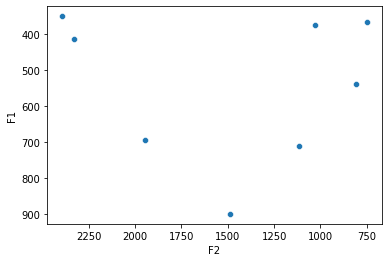

In [14]:
ax = sns.scatterplot(data=df, x=df['F2'], y=df['F1'])
ax.invert_yaxis()
ax.invert_xaxis()

vowelplot function below taken from: https://lingmethodshub.github.io/content/python/vowel-plotting-py/index.html

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def vowelplot (vowelcsv, color=None, F1="F1", F2="F2", vowel="Vowel", title="Vowel Plot", unit="Hz", logscale=True):
  
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='notebook')
    plt.figure(figsize=(6,6))
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal = "husl"
        else:
            pal = "viridis"
            
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             hue = color,
                             data = vowelcsv,
                             palette = pal)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             data = vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add unit to the axis labels
    F1name = str("F1 ("+unit+")")
    F2name = str("F2 ("+unit+")")
    laby = plt.ylabel(F1name)
    labx = plt.xlabel(F2name)

    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    # Add vowel labels
    
    if vowel != None: 
        for line,row in vowelcsv.iterrows():
            pl.text(vowelcsv[F2][line]+0.1,
                    vowelcsv[F1][line],
                    vowelcsv[vowel][line],
                    horizontalalignment = 'left',
                    size = 14, # Edit for larger plots!
                    color = 'black',
                   # weight = 'semibold' # Uncomment for larger plots!
                   )
    
    pl.set_title(title)
    pl.spines['top'].set_visible(False)
    pl.spines['right'].set_visible(False)
    plt.show()
    
    return pl

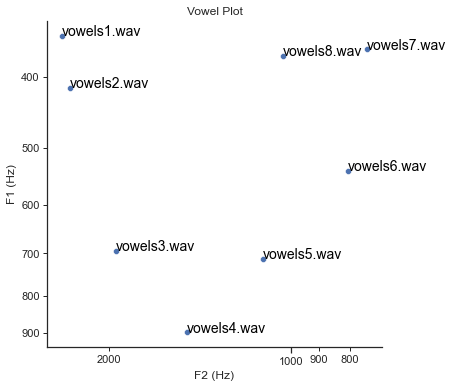

In [4]:
df = pd.read_csv('/Users/ethan/Desktop/formants.csv')
ax = vowelplot(df)
